<a href="https://colab.research.google.com/github/Sylwiaes/ML_projekt/blob/main/ML_projekt_zal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### <a name='a1'></a> 1.Opis projektu

Cel projektu: Wykorzystanie regresji logistycznej do sklasyfikowania danych w dwóch klasach diagnozy - złośliwej i łagodnej


Zbiór danych Wisconsin Breast Cancer (Diagnostic) został wyodrębniony z repozytorium UCI Machine Learning. Cechy są obliczane na podstawie cyfrowego obrazu aspiratu cienkoigłowego (FNA) masy piersi. Opisują cechy jąder komórkowych obecnych na obrazie. 
https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+(Diagnostic)

Dane pobrano bezpośrednio z biblioteki sklearn:
https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_breast_cancer.html
 

###  <a name='a2'></a> 2.Wczytanie danych

In [308]:
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
import seaborn as sns
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import plotly.figure_factory as ff

sns.set()
np.set_printoptions(precision=6, suppress=True, edgeitems=10, linewidth=100000, 
                    formatter=dict(float=lambda x: f'{x:.2f}'))



In [309]:
from sklearn.datasets import load_breast_cancer
cancer_data = load_breast_cancer()
cancer_data.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])

Wyświetlenie podstawowych informacji o zestawie danych

In [310]:
print(cancer_data.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry 
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 3 is Mean Radius, f

W badanym modelu wyróżnia się 2 klasy decyzyjne: nowotwór złośliwy i łagodny

In [311]:
print(cancer_data.target_names)

['malignant' 'benign']


Wygląd danych atrybutów wejściowych (data) i atrybutów decyzyjnych (target):

In [312]:
cancer = cancer_data.copy()
data = cancer['data']
target = cancer['target']
print(f'Rozmiar zmiennej objaśniającej - data: {data.shape}')
print(f'Rozmiar zmiennej docelowej - target: {target.shape}')

Rozmiar zmiennej objaśniającej - data: (569, 30)
Rozmiar zmiennej docelowej - target: (569,)


In [313]:
data_df = pd.DataFrame(data=cancer['data'] ,columns=cancer['feature_names'])
target_df = pd.DataFrame(data=cancer['target'], columns=['target']).reset_index(drop=True)
target_df.rename_axis(None)

df = pd.concat([data_df, target_df], axis=1)
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [314]:
print("Wymiary zbioru danych dotyczących nowotworu piersi : {}".format(df.shape))

Wymiary zbioru danych dotyczących nowotworu piersi : (569, 31)


In [315]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

###  <a name='a2'></a> 3.Wizualizacja zmiennych decyzyjnych i wejściowych

Dystrybucja klas w modelu

<BarContainer object of 2 artists>

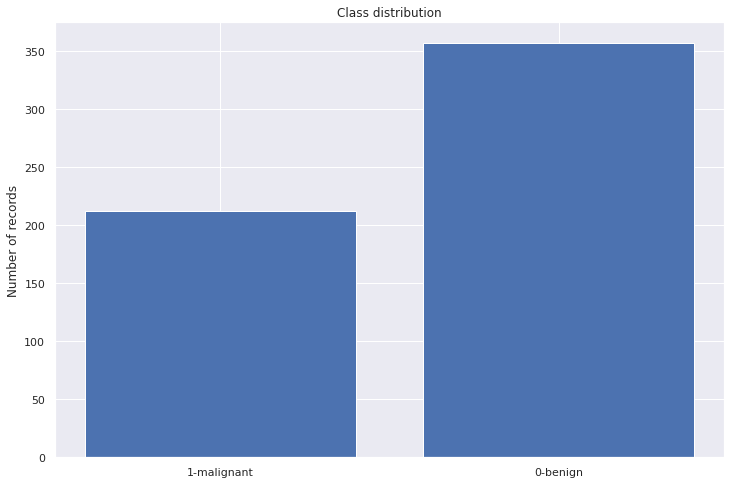

In [316]:
x = ["1-malignant", "0-benign"]
y = [212, 357]
plt.title("Class distribution")
plt.ylabel("Number of records")
plt.bar(x,y)

Wizualizacja atrybutów wejściowych

In [317]:
df.columns

Index(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error', 'fractal dimension error',
       'worst radius', 'worst texture', 'worst perimeter', 'worst area',
       'worst smoothness', 'worst compactness', 'worst concavity',
       'worst concave points', 'worst symmetry', 'worst fractal dimension',
       'target'],
      dtype='object')

target
0    [[AxesSubplot(0.125,0.779333;0.125x0.100667), ...
1    [[AxesSubplot(0.125,0.779333;0.125x0.100667), ...
dtype: object

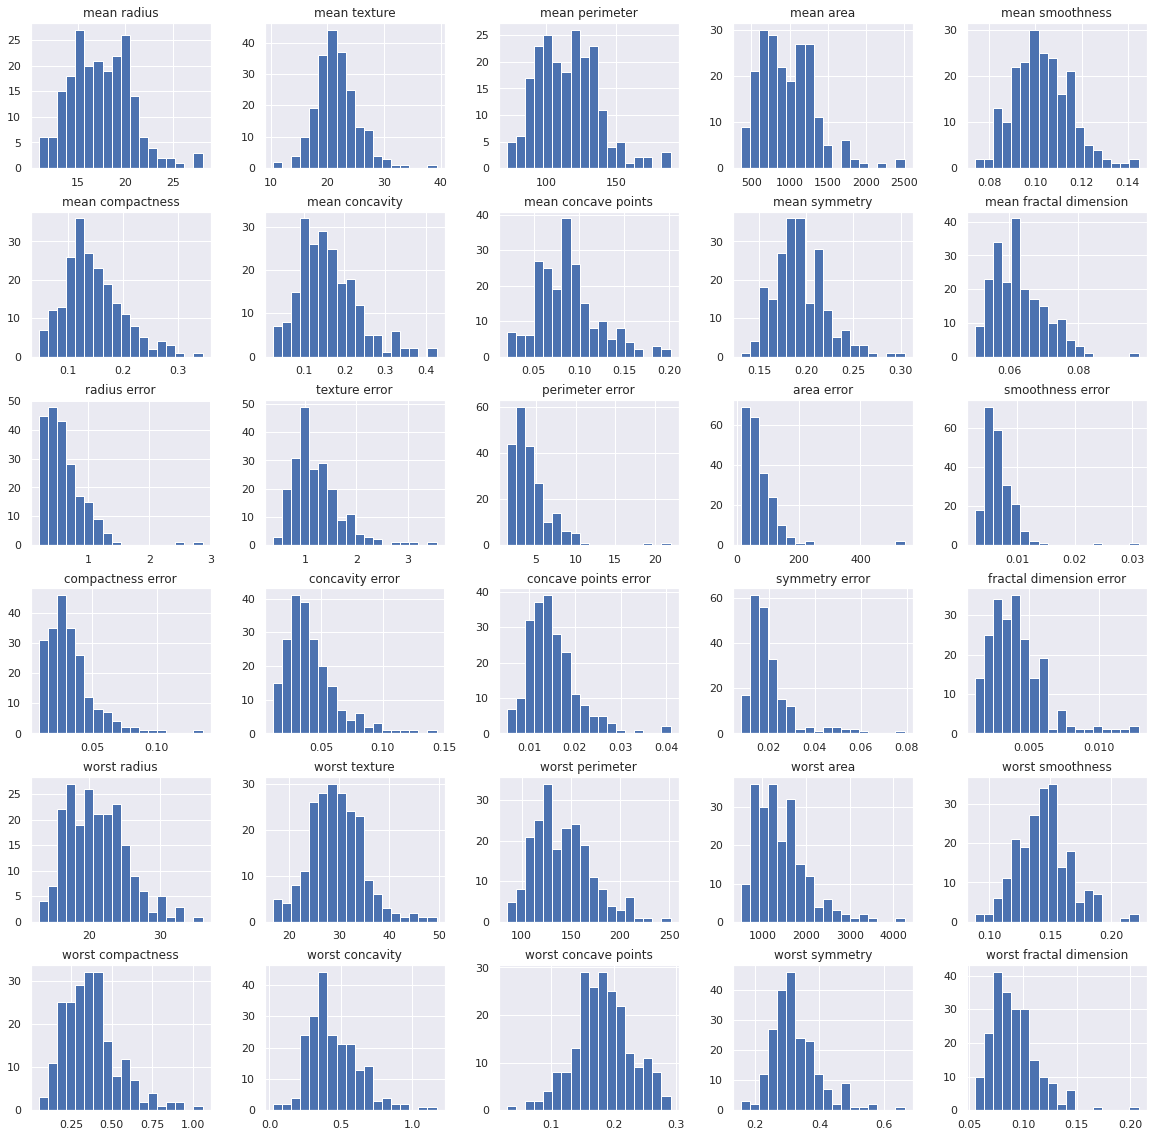

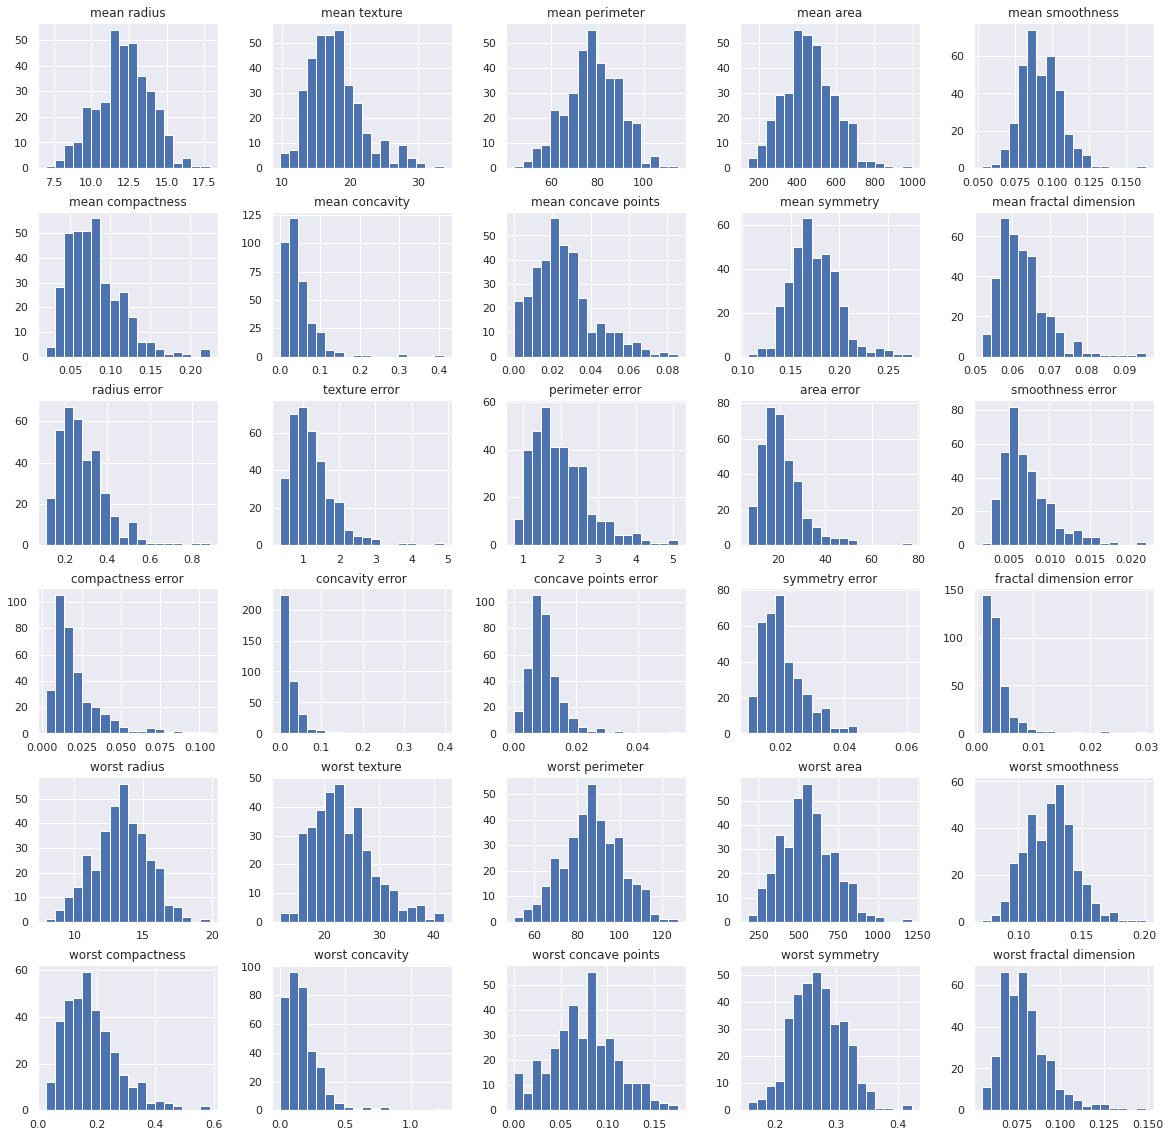

In [318]:
df.groupby('target').hist(bins=18, figsize=(20, 20))

**Obliczenie statystyk dla modelu**

In [319]:
df.describe().T 

,count,mean,std,min,25%,50%,75%,max
mean radius,569.0,14.127292,3.524049,6.981000,11.700000,13.370000,15.780000,28.11000
mean texture,569.0,19.289649,4.301036,9.710000,16.170000,18.840000,21.800000,39.28000
mean perimeter,569.0,91.969033,24.298981,43.790000,75.170000,86.240000,104.100000,188.50000
mean area,569.0,654.889104,351.914129,143.500000,420.300000,551.100000,782.700000,2501.00000
mean smoothness,569.0,0.096360,0.014064,0.052630,0.086370,0.095870,0.105300,0.16340
mean compactness,569.0,0.104341,0.052813,0.019380,0.064920,0.092630,0.130400,0.34540
mean concavity,569.0,0.088799,0.079720,0.000000,0.029560,0.061540,0.130700,0.42680
mean concave points,569.0,0.048919,0.038803,0.000000,0.020310,0.033500,0.074000,0.20120
mean symmetry,569.0,0.181162,0.027414,0.106000,0.161900,0.179200,0.195700,0.30400
mean fractal dimension,569.0,0.062798,0.007060,0.049960,0.057700,0.061540,0.066120,0.09744


###  <a name='a2'></a> 4.Analiza korelacji pomiędzy zmiennymi wejściowymi a zmienną decyzyjną

In [320]:
CORREL = df.corr().sort_values('target')
CORREL['target']

worst concave points      -0.793566
worst perimeter           -0.782914
mean concave points       -0.776614
worst radius              -0.776454
mean perimeter            -0.742636
worst area                -0.733825
mean radius               -0.730029
mean area                 -0.708984
mean concavity            -0.696360
worst concavity           -0.659610
mean compactness          -0.596534
worst compactness         -0.590998
radius error              -0.567134
perimeter error           -0.556141
area error                -0.548236
worst texture             -0.456903
worst smoothness          -0.421465
worst symmetry            -0.416294
mean texture              -0.415185
concave points error      -0.408042
mean smoothness           -0.358560
mean symmetry             -0.330499
worst fractal dimension   -0.323872
compactness error         -0.292999
concavity error           -0.253730
fractal dimension error   -0.077972
symmetry error             0.006522
texture error              0

Najmocniej skorelowane ze zmienną docelową są zmienne: mean fractal dimension (0.012838) i smoothness error (0.067016). 


**Mapa korelacji pomiędzy zmiennymi**

Korelacja między zmiennymi wskazuje, że gdy jedna zmienna zmienia wartość, druga zmienna ma tendencję do zmiany w określonym kierunku. Wykresy rozrzutu i mapa cieplna to dobre techniki wizualizacji do przeglądania korelacji między zmiennymi ciągłymi

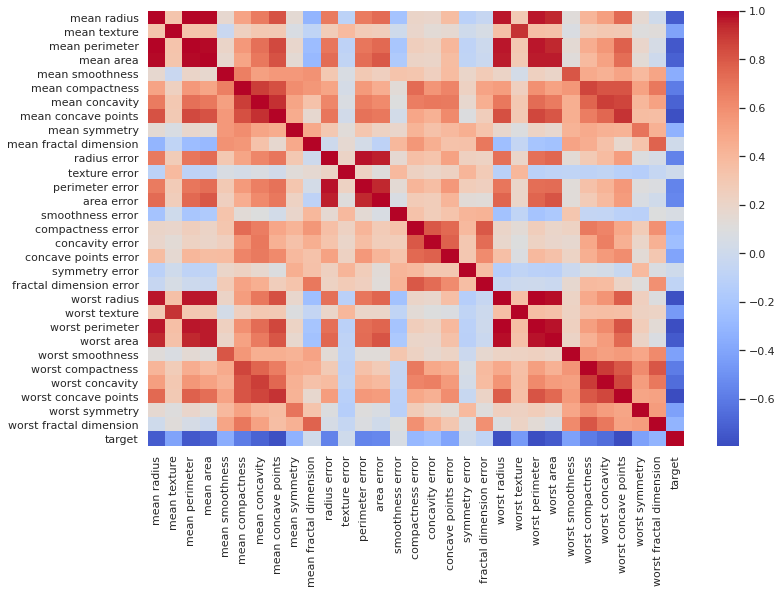

In [321]:
import seaborn as sns
 
sns.set(rc={'figure.figsize':(12,8)})
ax = sns.heatmap(df_corr, cmap="coolwarm")

**Zmienne dodatnio skorelowane**

Cechy dodatnio skorelowane to te, w których wartość jednej zmiennej rośnie wraz ze wzrostem drugiej, powodując nachylenie w górę, co wskazuje na dodatnią korelację ze wszystkimi punktami danych przypadającymi na prostej.

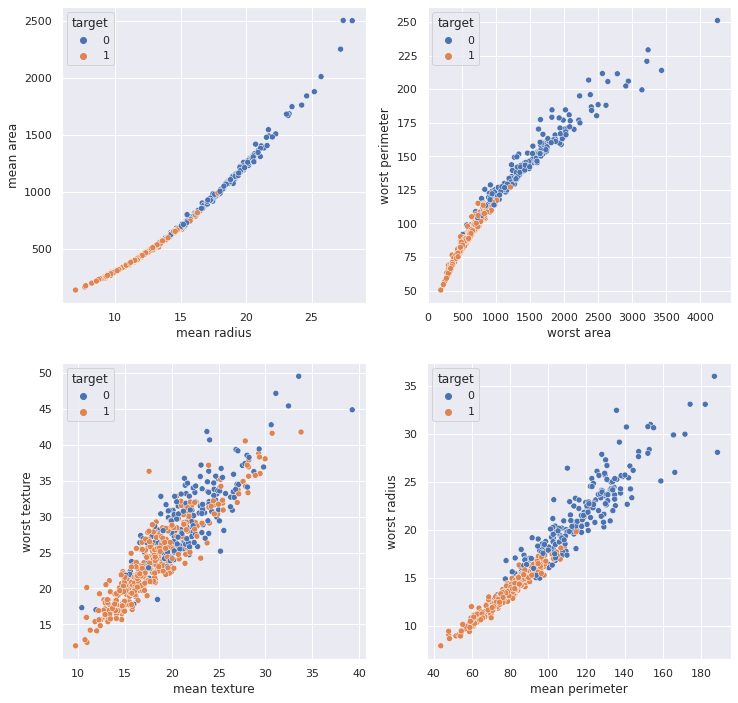

In [322]:
fig = plt.figure(figsize=(12,12))
plt.subplot(221)
sns.scatterplot(data=df, x="mean radius", y="mean area", hue="target")
plt.subplot(222)
sns.scatterplot(data=df, x="worst area", y="worst perimeter", hue="target")
plt.subplot(223)
sns.scatterplot(data=df, x="mean texture", y="worst texture", hue="target")
plt.subplot(224)
sns.scatterplot(data=df, x="mean perimeter", y="worst radius", hue="target")

plt.show()

**Zmienne ujemnie skorelowane**

Cechy skorelowane ujemnie reprezentują przypadki, w których wartość jednej zmiennej wzrasta, a wartość drugiej zmiennej ma tendencję do zmniejszania się, powodując spadek.

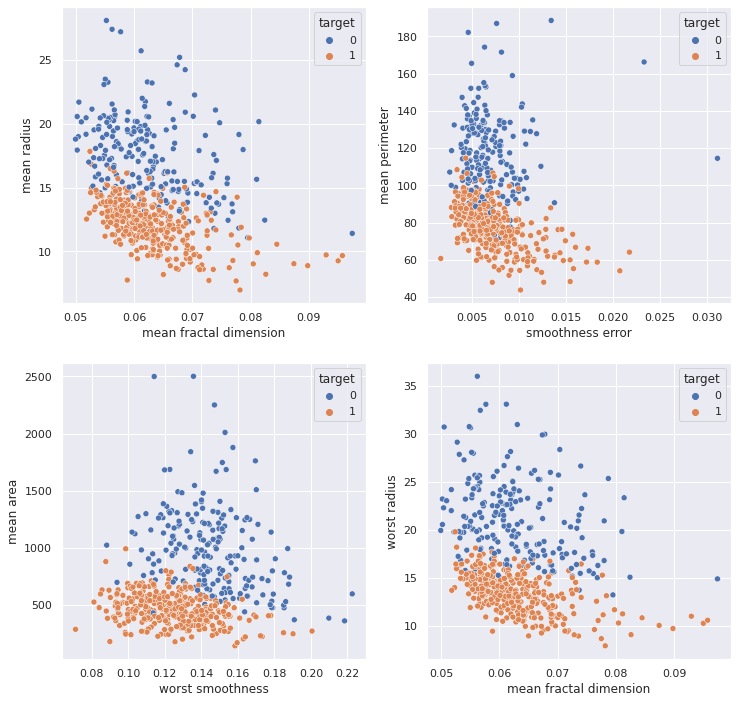

In [323]:
fig = plt.figure(figsize=(12,12))
plt.subplot(221)
sns.scatterplot(data=df, x="mean fractal dimension", y="mean radius", hue="target")
plt.subplot(222)
sns.scatterplot(data=df, x="smoothness error", y="mean perimeter", hue="target")
plt.subplot(223)
sns.scatterplot(data=df, x="worst smoothness", y="mean area", hue="target")
plt.subplot(224)
sns.scatterplot(data=df, x="mean fractal dimension", y="worst radius", hue="target")


plt.show()

###  <a name='a4'></a> 5.Podział danych na zbiór treningowy i testowy

Tworzymy zestawy treningowe i testowe, aby upewnić się, że po przeszkoleniu naszego algorytmu klasyfikacji jest on w stanie dobrze dopasować się do nowych danych. Atrybutem wejściowym są 'data', atrybutem decyzyjnym jest 'target'.

System treningowy i testowy podzielone są w stosunku 75% : 25%

In [376]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=.25)

print(f'X_train shape: {X_train.shape}')
print(f'y_train shape: {y_train.shape}')
print(f'X_test shape: {X_test.shape}')
print(f'y_test shape: {y_test.shape}')

X_train shape: (426, 30)
y_train shape: (426,)
X_test shape: (143, 30)
y_test shape: (143,)


In [377]:
X_train

array([[17.85, 13.23, 114.60, 992.10, 0.08, 0.06, 0.04, 0.04, 0.12, 0.05, ..., 19.82, 18.42, 127.10, 1210.00, 0.10, 0.10, 0.10, 0.08, 0.18, 0.06],
       [15.50, 21.08, 102.90, 803.10, 0.11, 0.16, 0.15, 0.08, 0.21, 0.07, ..., 23.17, 27.65, 157.10, 1748.00, 0.15, 0.40, 0.42, 0.21, 0.30, 0.10],
       [11.84, 18.70, 77.93, 440.60, 0.11, 0.15, 0.12, 0.05, 0.23, 0.08, ..., 16.82, 28.12, 119.40, 888.70, 0.16, 0.58, 0.70, 0.15, 0.48, 0.14],
       [13.71, 18.68, 88.73, 571.00, 0.10, 0.11, 0.05, 0.04, 0.17, 0.07, ..., 15.11, 25.63, 99.43, 701.90, 0.14, 0.26, 0.19, 0.13, 0.28, 0.09],
       [15.28, 22.41, 98.92, 710.60, 0.09, 0.11, 0.05, 0.03, 0.17, 0.06, ..., 17.80, 28.03, 113.80, 973.10, 0.13, 0.33, 0.36, 0.12, 0.32, 0.10],
       [8.73, 16.84, 55.27, 234.30, 0.10, 0.07, 0.00, 0.00, 0.20, 0.07, ..., 10.17, 22.80, 64.01, 317.00, 0.15, 0.13, 0.00, 0.00, 0.24, 0.09],
       [12.05, 14.63, 78.04, 449.30, 0.10, 0.09, 0.07, 0.03, 0.17, 0.06, ..., 13.76, 20.70, 89.88, 582.60, 0.15, 0.22, 0.30, 0.07

In [378]:
X_test

array([[13.68, 16.33, 87.76, 575.50, 0.09, 0.07, 0.02, 0.02, 0.16, 0.06, ..., 15.85, 20.20, 101.60, 773.40, 0.13, 0.16, 0.12, 0.09, 0.28, 0.08],
       [6.98, 13.43, 43.79, 143.50, 0.12, 0.08, 0.00, 0.00, 0.19, 0.08, ..., 7.93, 19.54, 50.41, 185.20, 0.16, 0.12, 0.00, 0.00, 0.29, 0.09],
       [10.86, 21.48, 68.51, 360.50, 0.07, 0.04, 0.00, 0.00, 0.17, 0.06, ..., 11.66, 24.77, 74.08, 412.30, 0.10, 0.07, 0.00, 0.00, 0.25, 0.07],
       [12.96, 18.29, 84.18, 525.20, 0.07, 0.08, 0.04, 0.02, 0.19, 0.06, ..., 14.13, 24.61, 96.31, 621.90, 0.09, 0.23, 0.16, 0.07, 0.32, 0.07],
       [13.00, 21.82, 87.50, 519.80, 0.13, 0.19, 0.19, 0.09, 0.23, 0.07, ..., 15.49, 30.73, 106.20, 739.30, 0.17, 0.54, 0.54, 0.21, 0.44, 0.11],
       [12.18, 20.52, 77.22, 458.70, 0.08, 0.04, 0.02, 0.02, 0.17, 0.06, ..., 13.34, 32.84, 84.58, 547.80, 0.11, 0.09, 0.11, 0.07, 0.27, 0.07],
       [9.04, 18.90, 60.07, 244.50, 0.10, 0.20, 0.20, 0.05, 0.23, 0.09, ..., 10.06, 23.40, 68.62, 297.10, 0.12, 0.37, 0.46, 0.11, 0.31, 

In [379]:
y_train

array([1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 

In [380]:
y_test

array([1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0])

Wystandaryzowanie danych na zbiorze treningowym i testowym co pozwoli na przyspieszenie obliczeń

In [381]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)
X_train

array([[1.05, -1.43, 0.92, 0.95, -1.27, -0.79, -0.56, -0.19, -2.09, -1.43, ..., 0.73, -1.19, 0.59, 0.58, -1.51, -0.98, -0.82, -0.47, -1.78, -1.37],
       [0.38, 0.41, 0.44, 0.41, 1.11, 0.98, 0.77, 0.90, 0.97, 0.81, ..., 1.43, 0.31, 1.49, 1.54, 0.88, 0.94, 0.72, 1.53, 0.17, 1.13],
       [-0.66, -0.15, -0.59, -0.62, 1.03, 0.88, 0.40, 0.07, 1.73, 2.11, ..., 0.11, 0.39, 0.36, 0.01, 1.42, 2.08, 2.05, 0.62, 2.98, 3.04],
       [-0.13, -0.15, -0.15, -0.25, 0.20, 0.05, -0.44, -0.29, -0.34, 0.78, ..., -0.25, -0.02, -0.24, -0.32, 0.46, 0.02, -0.39, 0.22, -0.08, 0.34],
       [0.31, 0.72, 0.27, 0.15, -0.41, 0.01, -0.45, -0.42, -0.30, 0.05, ..., 0.31, 0.37, 0.19, 0.16, -0.09, 0.49, 0.43, 0.13, 0.45, 0.74],
       [-1.55, -0.58, -1.53, -1.21, 0.53, -0.56, -1.11, -1.24, 0.61, 1.14, ..., -1.28, -0.48, -1.30, -1.01, 0.62, -0.78, -1.33, -1.75, -0.72, 0.25],
       [-0.60, -1.10, -0.59, -0.60, 0.48, -0.25, -0.29, -0.55, -0.48, -0.32, ..., -0.53, -0.82, -0.53, -0.53, 0.77, -0.24, 0.15, -0.75, -0.24, -0

In [382]:
X_test

array([[-0.14, -0.70, -0.19, -0.24, -0.25, -0.60, -0.89, -0.77, -0.64, -0.17, ..., -0.09, -0.90, -0.18, -0.19, -0.26, -0.62, -0.75, -0.42, -0.14, -0.33],
       [-2.04, -1.38, -2.00, -1.47, 1.46, -0.54, -1.11, -1.24, 0.42, 2.13, ..., -1.74, -1.01, -1.71, -1.24, 1.18, -0.85, -1.33, -1.75, 0.06, 0.53],
       [-0.94, 0.50, -0.98, -0.85, -1.56, -1.16, -1.11, -1.24, -0.53, -0.46, ..., -0.97, -0.16, -1.00, -0.84, -1.44, -1.15, -1.33, -1.75, -0.70, -0.98],
       [-0.34, -0.24, -0.33, -0.38, -1.62, -0.48, -0.61, -0.77, 0.22, -0.52, ..., -0.45, -0.18, -0.34, -0.46, -1.75, -0.14, -0.55, -0.74, 0.50, -0.62],
       [-0.33, 0.58, -0.20, -0.40, 2.19, 1.66, 1.19, 1.12, 1.91, 1.54, ..., -0.17, 0.81, -0.04, -0.26, 1.71, 1.84, 1.29, 1.41, 2.37, 1.26],
       [-0.57, 0.28, -0.62, -0.57, -1.15, -1.20, -0.82, -0.80, -0.26, -0.83, ..., -0.62, 1.15, -0.69, -0.60, -0.90, -1.05, -0.78, -0.61, -0.32, -0.82],
       [-1.46, -0.10, -1.33, -1.18, 0.23, 1.73, 1.33, -0.00, 1.83, 3.41, ..., -1.30, -0.38, -1.17, -1

Obliczenie średniej

In [383]:
scaler.mean_

array([14.17, 19.33, 92.26, 658.46, 0.10, 0.10, 0.09, 0.05, 0.18, 0.06, 0.40, 1.22, 2.85, 40.05, 0.01, 0.03, 0.03, 0.01, 0.02, 0.00, 16.30, 25.74, 107.50, 882.78, 0.13, 0.25, 0.27, 0.11, 0.29, 0.08])

Obliczenie odchylenia standardowego

In [384]:
scaler.scale_

array([3.52, 4.28, 24.26, 350.50, 0.01, 0.05, 0.08, 0.04, 0.03, 0.01, 0.27, 0.55, 1.98, 42.88, 0.00, 0.02, 0.03, 0.01, 0.01, 0.00, 4.80, 6.15, 33.36, 561.77, 0.02, 0.16, 0.21, 0.07, 0.06, 0.02])

Dopasowanie modelu - regresja logistyczna. Model zostanie przeszkolony na X_train i y_train

In [385]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(C=0.5, random_state=1).fit(X_train, y_train)
classifier.fit(X_train, y_train) 

LogisticRegression(C=0.5, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=1, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

###<a name='a6'></a>  6.Predykcja na podstawie modelu-funkcja straty

Stosujemy metodę predict, która zwraca nam czy dana osoba ma nowotwór złośliwy, czy też nie. Na tym etapie log_regression.predict()funkcja służy do przewidywania wartości dla zestawu testowego, a wartości są zapisywane w zmiennej y_pred.

In [386]:
y_pred = classifier.predict(X_test)
y_pred

array([1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0])

Zwrócenie konkretnego prawdopodobieństwa. Prawdopodobieństwo dla klasy 0 (nowotwór łagodny) -> pierwsza kolumna, prawdopodobieństwo dla klasy 1 (nowotwór złośliwy) -> druga kolumna. Przykładowo dla pierwszej cechy z modelu predict mamy [0.14,  0.86], co oznacza większe prawdopodobieństwo zachorowania na nowotwór złośliwy.

In [387]:
y_prob = classifier.predict_proba(X_test)
y_prob

array([[0.01, 0.99],
       [0.00, 1.00],
       [0.00, 1.00],
       [0.00, 1.00],
       [0.99, 0.01],
       [0.01, 0.99],
       [0.00, 1.00],
       [0.86, 0.14],
       [0.14, 0.86],
       [0.00, 1.00],
       [0.14, 0.86],
       [0.00, 1.00],
       [0.00, 1.00],
       [1.00, 0.00],
       [0.00, 1.00],
       [1.00, 0.00],
       [0.00, 1.00],
       [0.66, 0.34],
       [0.09, 0.91],
       [0.01, 0.99],
       [0.99, 0.01],
       [0.00, 1.00],
       [1.00, 0.00],
       [0.00, 1.00],
       [0.02, 0.98],
       [0.01, 0.99],
       [0.42, 0.58],
       [0.00, 1.00],
       [0.02, 0.98],
       [0.01, 0.99],
       [0.00, 1.00],
       [0.08, 0.92],
       [0.01, 0.99],
       [0.99, 0.01],
       [0.01, 0.99],
       [1.00, 0.00],
       [0.00, 1.00],
       [0.98, 0.02],
       [0.00, 1.00],
       [0.02, 0.98],
       [0.02, 0.98],
       [0.99, 0.01],
       [0.00, 1.00],
       [0.01, 0.99],
       [0.62, 0.38],
       [0.03, 0.97],
       [0.00, 1.00],
       [0.00,

**Porównanie wartości rzeczywistych z wartościami przewidywanymi**

Na tym etapie tworzona jest ramka Pandas DataFrame, aby porównać sklasyfikowane wartości zarówno oryginalnego zestawu testowego ( y_test ), jak i przewidywanych wyników ( y_pred ).

In [388]:
df = pd.DataFrame({'Real Values':y_test, 'Predicted Values':y_pred})
df

,Real Values,Predicted Values
0,1,1
1,1,1
2,1,1
3,1,1
4,0,0
...,...,...
138,1,1
139,1,1
140,1,1
141,0,0


###<a name='a7'></a>  7.Wskaźniki oceny do klasyfikacji

**Ocena dokładności modelu**

In [389]:
acc = accuracy_score(y_test, y_pred) * 100 
print(f'Dokladność wytrenowanego modelu: {acc}%')

Dokladność wytrenowanego modelu: 98.6013986013986%


In [390]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score #Dokładność modelu
from mlxtend.plotting import plot_confusion_matrix

conf_matrix = confusion_matrix(y_test, y_pred)


def plot_confusion_matrix(conf_matrix): #podobne przedstawienie powyższych danych w bardziej interaktywny sposób
    conf_matrix = conf_matrix[::-1]
    conf_matrix = pd.DataFrame(conf_matrix, columns=['predict_0', 'predict_1'], index=['true_1', 'true_0'])

    fig = ff.create_annotated_heatmap(z=conf_matrix.values, x=list(conf_matrix.columns), y=list(conf_matrix.index), 
                                      colorscale='ice', showscale=True, reversescale=True)
    fig.update_layout(width=500, height=500, title='Confusion Matrix', font_size=12)
    fig.show()

plot_confusion_matrix(conf_matrix)

Macierz nieporozumień jest tabelą używaną do pokazania liczby prawidłowych i niepoprawnych prognoz dotyczących problemu klasyfikacji, gdy znane są rzeczywiste wartości zestawu testowego. 

Wykres przedstawia macierz konfuzji z dwoma danymi x - przewidzianymi przez model, y - prawdziwe dane. 

*   Prawdziwie łagodny: nowotwór łagodny prawidłowo zidentyfikowany jako łagodny
*   Prawdziwie złośliwy: nowotwór złośliwy prawidłowo zidentyfikowany jako złośliwy
*   Fałszywie łagodny: nowotwór złośliwy nieprawidłowo zidentyfikowany jako łagodny
*   Fałszywie złośliwy: nowotwór łagodny nieprawidłowo zidentyfikowany jako złośliwy

Dokładność wytrenowanego modelu przedstawia się na poziomie 98%, co stwierdza, że jest dość wysoka, a model nie cierpi z powodu niedostatecznego lub nadmiernego dopasowania.

**Raport klasyfikacji**

In [391]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred)) 

              precision    recall  f1-score   support

           0       1.00      0.96      0.98        54
           1       0.98      1.00      0.99        89

    accuracy                           0.99       143
   macro avg       0.99      0.98      0.99       143
weighted avg       0.99      0.99      0.99       143



**Dokładność** : Dokładność to stosunek wyników rzeczywistych do całkowitej liczby próbek przypadków: (TP + TN) / (TP + TN + FP + FN)
**Precyzja** : odsetek przewidywanych wyników dodatnich, które są faktycznie dodatnie: TP / (TP + FP)
Przywołanie LUB Czułość LUB TPR : Odsetek faktycznych pozytywów prawidłowo sklasyfikowanych: TP / (TP + FN)\
**Specyfika**: Odsetek faktycznych negatywów poprawnie sklasyfikowanych: TN / (TN + FP)\
**Wynik F1**: Wynik F1 w pewnym sensie utrzymuje równowagę między precyzją a odtwarzaniem dla klasyfikatora, nadając równą wagę zarówno precyzji, jak i powtarzalności. Niższa precyzja, niższy wynik F1. Im niższa częstotliwość, tym niższy jest wynik F1. Wartość F1 mieści się w zakresie od 0 do 1 i jest średnią dokładności i przywołania: 2 * (Precyzja * Przywołanie / Precyzja + Przywołanie)